In [1]:
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import yfinance as yf
import datetime as dt

2023-04-27 12:14:30.071943: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 12:14:30.228515: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 12:14:30.229377: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 12:14:31.359483: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime.now()
df = yf.download('RELIANCE.NS', start=start,end=end)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00+05:30,540.427307,540.427307,506.127411,532.700500,482.812500,35372156
2010-01-05 00:00:00+05:30,569.551208,569.551208,527.697937,530.323059,480.657623,9872785
2010-01-06 00:00:00+05:30,534.879883,542.111328,530.298279,538.891846,488.423950,10933743
2010-01-07 00:00:00+05:30,538.891846,552.265076,533.938782,547.832092,496.526978,12090336
2010-01-08 00:00:00+05:30,548.797974,551.670715,542.854309,546.395691,495.225067,6973331
...,...,...,...,...,...,...
2023-04-21 00:00:00+05:30,2350.649902,2361.000000,2336.399902,2349.000000,2349.000000,3529236
2023-04-24 00:00:00+05:30,2375.000000,2380.899902,2348.000000,2358.000000,2358.000000,5970048
2023-04-25 00:00:00+05:30,2366.000000,2380.600098,2350.500000,2376.050049,2376.050049,4262471


In [3]:
output_var = PD.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [4]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= PD.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-01-04 00:00:00+05:30,0.081725,0.080316,0.070437,0.406288
2010-01-05 00:00:00+05:30,0.093274,0.091883,0.079231,0.113400
2010-01-06 00:00:00+05:30,0.079526,0.080985,0.080291,0.125586
2010-01-07 00:00:00+05:30,0.081116,0.085018,0.081776,0.138871
2010-01-08 00:00:00+05:30,0.085045,0.084782,0.085410,0.080096


In [5]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [6]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [7]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


2023-04-27 12:14:34.192543: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-27 12:14:34.193746: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
374/374 [==============================] - 2s 3ms/step - loss: 1081082.8750
Epoch 2/100
374/374 [==============================] - 1s 3ms/step - loss: 1061518.1250
Epoch 3/100
374/374 [==============================] - 1s 3ms/step - loss: 1033978.2500
Epoch 4/100
374/374 [==============================] - 1s 2ms/step - loss: 998748.5000
Epoch 5/100
374/374 [==============================] - 1s 2ms/step - loss: 957001.5000
Epoch 6/100
374/374 [==============================] - 1s 3ms/step - loss: 910148.0625
Epoch 7/100
374/374 [==============================] - 1s 2ms/step - loss: 859489.0625
Epoch 8/100
374/374 [==============================] - 1s 2ms/step - loss: 806172.8750
Epoch 9/100
374/374 [==============================] - 1s 3ms/step - loss: 751207.1250
Epoch 10/100
374/374 [==============================] - 1s 3ms/step - loss: 695485.6875
Epoch 11/100
374/374 [==============================] - 1s 2ms/step - loss: 639804.5000
Epoch 12/100
374/374 [================

In [8]:
y_pred= lstm.predict(X_test)

10/10 [==============================] - 0s 2ms/step


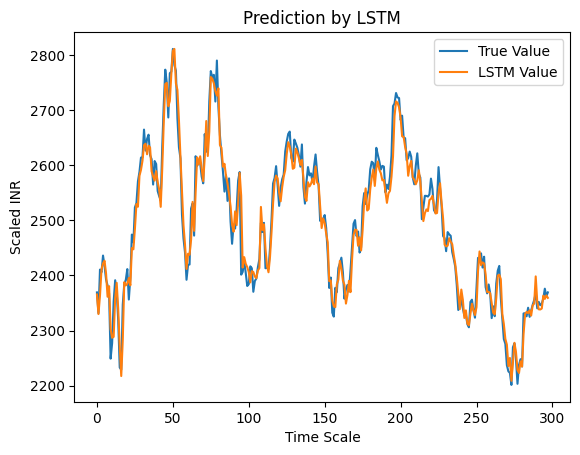

In [9]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled INR')
plt.legend()
plt.show()